# **Philippine Scam SMS**
**Phase 3: Data Visualization**

**Author/s: [Anton Reyes](https://www.github.com/AGR-yes)**

## **Introduction**

### **Requirements and Imports**

#### **Imports**

**Basic Libraries**

* `numpy` contains a large collection of mathematical functions
* `pandas` contains functions that are designed for data manipulation and data analysis

In [1]:
import numpy as np
import pandas as pd

**Visualization Libraries**

* `matplotlib.pyplot` contains functions to create interactive plots
* `seaborn` is a library based on matplotlib that allows for data visualization
* `plotly` is an open-source graphing library for Python.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import plotly.io as pio

pio.renderers.default = "browser"

**Natural Language Processing Libraries**
* `re` is a module that allows the use of regular expressions

In [3]:
import re

#### **Datasets and Files**

The following `csv` files was used for this project:

- `incidents.csv` contains 2019 data of how many spam texts were received in each region of the Philippines.
- `proof_cleaned.csv` contains data from the `select.csv` and `spam.csv` that has been processed already with Natural Language Processing methods.
- `select.csv` contains the necessary columns from Google Sheets.
- `spam.csv` contains the necessary columns from a Kaggle user's own spam texts that they've received.
- `top100_words.csv` contains the top 100 commons words from the `proof_cleaned.csv` 

## **Data Collection**

Importing the dataset using pandas.

In [4]:
incidents = pd.read_csv("Processed Datasets/incidents.csv")
proof = pd.read_csv("Processed Datasets/proof_cleaned.csv")
select = pd.read_csv("Processed Datasets/select.csv")
spam = pd.read_csv("Processed Datasets/spam.csv")
top100 = pd.read_csv("Processed Datasets/top100_words.csv")

datasets = [incidents, proof, select, spam, top100]

In [5]:
for i in datasets:
    display(i.head())

,region,number
0,BARMM,390.48
1,CAR,112.60
2,CARAGA,500.00
3,NCR,2739.52
4,Region 1,113.30


,proof,name,type,token
0,poea,False,others,['POEA']
1,poea,False,others,['POEA']
2,federal partylist,False,others,"['Federal', 'Partylist']"
3,build build build,False,others,"['Build', 'Build', 'Build']"
4,luckyphilcomlogin,False,casino/gambling,['luckyphilcomlogin']


,id,number,network,type,proof,name,indicator
0,1,9103239417,Unknown,work,NaN,False,910
1,2,95348643,Unknown,others,NaN,False,953
2,3,931804865,Unknown,work,NaN,False,931
3,4,981197529,Unknown,lotto,NaN,False,981
4,5,981369614,Unknown,work,NaN,False,981


,proof,Date,Time,name
0,"Welcome ! your have P1222 for S!ot , \nWeb: 11...",2022-11-12,14:02,False
1,"My god, at least 999P rewards waiting for you\...",2022-11-12,14:33,False
2,"DEAR VIP , No. 1 Online Sabong Site here in SB...",2022-11-13,23:03,True
3,"! Today, you can win the iphone14PROMAX while ...",2022-11-14,00:07,True
4,"Welcome ! your have P1222 for S!ot , \nWeb: gr...",2022-11-15,02:28,False


,word,count
0,now,157
1,bonus,122
2,message,68
3,LIGHTS,67
4,3,66


## **Description of the Dataset**

Here, we find the shape of the dataset.

In [6]:
#printing shape of each dataset from the list
for i in datasets:
    print(i.shape)

(17, 2)
(1414, 4)
(4883, 7)
(159, 4)
(100, 2)


By looking at the `info` of the dataframe, we can see that there are `non-null` values. 

In [7]:
for i in datasets:
    display(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   region  17 non-null     object 
 1   number  17 non-null     float64
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   proof   1404 non-null   object
 1   name    1414 non-null   bool  
 2   type    1228 non-null   object
 3   token   1414 non-null   object
dtypes: bool(1), object(3)
memory usage: 34.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4883 entries, 0 to 4882
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         4883 non-null   int64 
 1   number     4883 non-null   object
 2   network    4883 non-null   object
 3   type       4679 non-null   object
 4   proof      1255 non-null   object
 5   name       4883 non-null   bool  
 6   indicator  4883 non-null   object
dtypes: bool(1), int64(1), object(5)
memory usage: 233.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   proof   159 non-null    object
 1   Date    159 non-null    object
 2   Time    159 non-null    object
 3   name    159 non-null    bool  
dtypes: bool(1), object(3)
memory usage: 4.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    100 non-null    object
 1   count   100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


None

## **Charts**

### **Type & Name**

In [8]:
proof.head()

,proof,name,type,token
0,poea,False,others,['POEA']
1,poea,False,others,['POEA']
2,federal partylist,False,others,"['Federal', 'Partylist']"
3,build build build,False,others,"['Build', 'Build', 'Build']"
4,luckyphilcomlogin,False,casino/gambling,['luckyphilcomlogin']


#### **Type**

In [9]:
proof_type = pd.DataFrame(proof['type'].value_counts()).reset_index()
proof_type

,index,type
0,others,341
1,casino/gambling,304
2,online activity,209
3,bank/money,186
4,free,96
5,work,92


In [10]:
#change column name by column index
proof_type.rename(columns = {proof_type.columns[0]:'type', proof_type.columns[1]:'count'}, inplace = True)
proof_type

,type,count
0,others,341
1,casino/gambling,304
2,online activity,209
3,bank/money,186
4,free,96
5,work,92


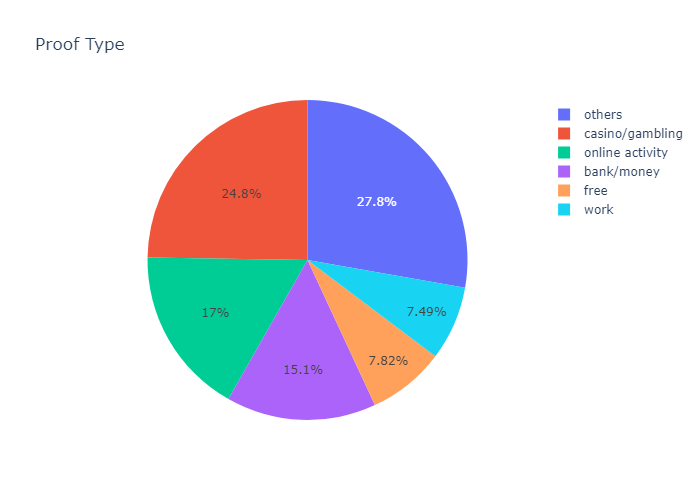

In [11]:
#using plotly, make  a pie chart
fig = px.pie(proof_type, values = 'count', names = 'type', title = 'Proof Type')

fig.show("png")

#### **Name**

In [12]:
proof_name = pd.DataFrame(proof['name'].value_counts()).reset_index()
proof_name

,index,name
0,False,1204
1,True,210


In [13]:
#change column name by column index
proof_name.rename(columns = {proof_name.columns[0]:'type', proof_name.columns[1]:'count'}, inplace = True)
proof_name

,type,count
0,False,1204
1,True,210


In [14]:
#changing False to "No name", True to "Includes name"
proof_name['type'] = proof_name['type'].replace([False, True], ['No name', 'Includes name'])

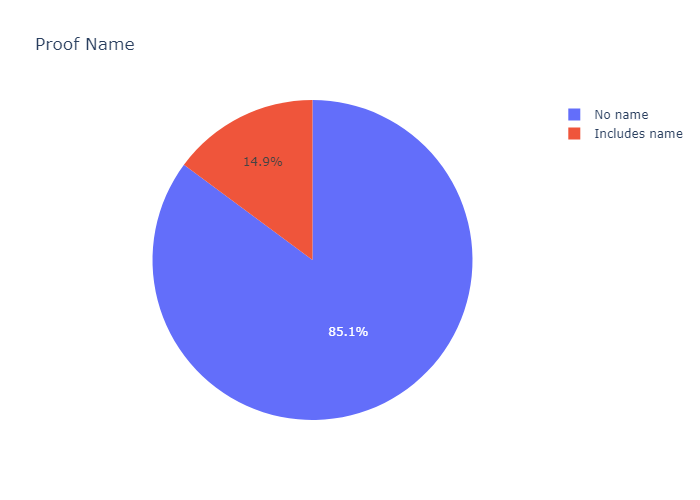

In [15]:
fig = px.pie(proof_name, values = 'count', names = 'type', title = 'Proof Name')
fig.show("png")

#### **Types for Texts With Names**

In [16]:
nametype = pd.DataFrame(proof[['type']][proof['name'] == True].value_counts()).reset_index()
#change column name by column index
nametype.rename(columns = {nametype.columns[0]:'type', nametype.columns[1]:'count'}, inplace = True)
nametype

,type,count
0,others,75
1,casino/gambling,24
2,free,17
3,online activity,13
4,bank/money,10


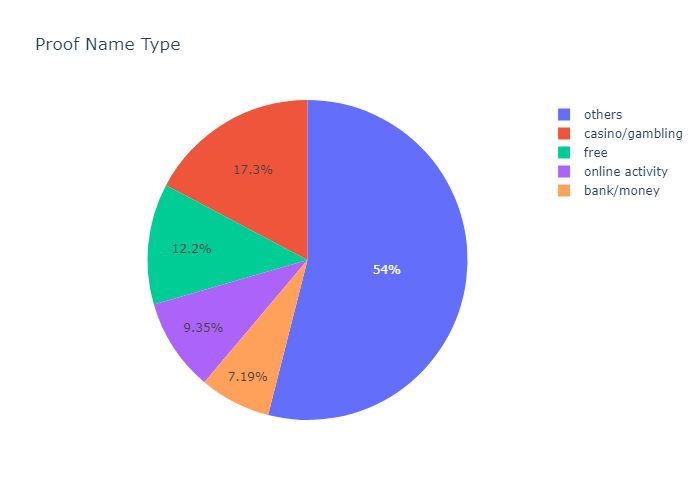

In [17]:
fig = px.pie(nametype, values = 'count', names = 'type', title = 'Proof Name Type')
fig.show("png")

### **Number**

In [18]:
select.head()

,id,number,network,type,proof,name,indicator
0,1,9103239417,Unknown,work,NaN,False,910
1,2,95348643,Unknown,others,NaN,False,953
2,3,931804865,Unknown,work,NaN,False,931
3,4,981197529,Unknown,lotto,NaN,False,981
4,5,981369614,Unknown,work,NaN,False,981


In [19]:
number = pd.DataFrame(select['network'].value_counts()).reset_index()
#change column name by column index
number.rename(columns = {number.columns[0]:'network', number.columns[1]:'count'}, inplace = True)
number

,network,count
0,Smart or Talk 'N Text,3494
1,Globe or TM,1240
2,Sun Cellular,134
3,Unknown,15


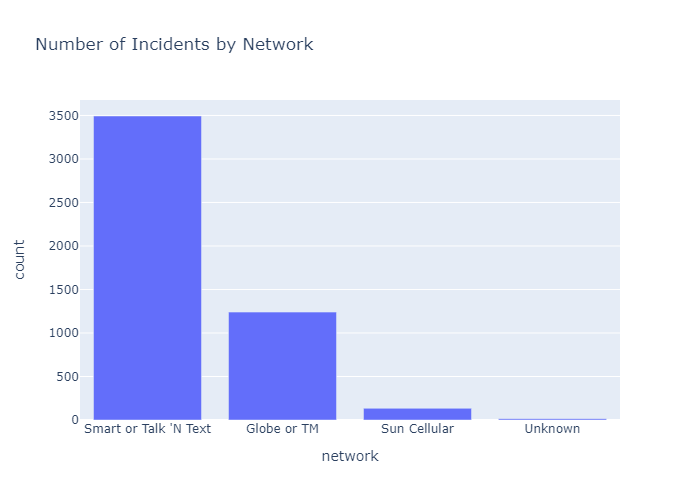

In [20]:
fig = px.bar(number, x = 'network', y = 'count', title = 'Number of Incidents by Network')
fig.show("png")

### **Top 100 Words**

In [21]:
top100.head()

,word,count
0,now,157
1,bonus,122
2,message,68
3,LIGHTS,67
4,3,66


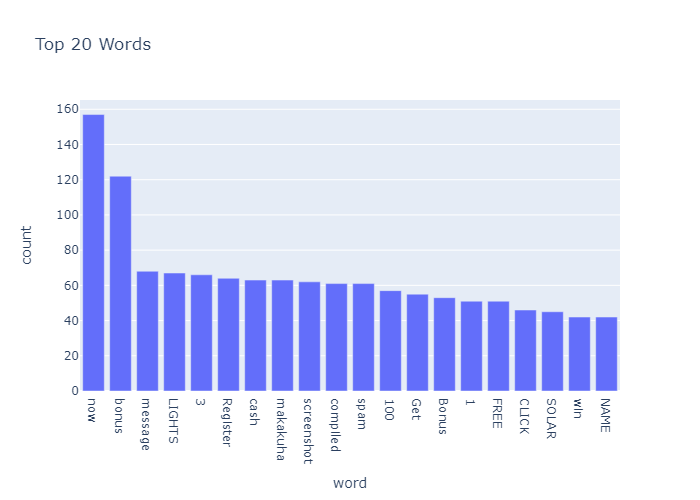

In [22]:
#plot the top 20 words
fig = px.bar(top100[:20], x = 'word', y = 'count', title = 'Top 20 Words')
fig.show("png")

### **Peak Time of Texts**

In [23]:
spam.head()

,proof,Date,Time,name
0,"Welcome ! your have P1222 for S!ot , \nWeb: 11...",2022-11-12,14:02,False
1,"My god, at least 999P rewards waiting for you\...",2022-11-12,14:33,False
2,"DEAR VIP , No. 1 Online Sabong Site here in SB...",2022-11-13,23:03,True
3,"! Today, you can win the iphone14PROMAX while ...",2022-11-14,00:07,True
4,"Welcome ! your have P1222 for S!ot , \nWeb: gr...",2022-11-15,02:28,False


#### **Date**

In [24]:
#get the day of the week in the Date column
spam['day'] = pd.to_datetime(spam['Date']).dt.day_name()
spam.head()

,proof,Date,Time,name,day
0,"Welcome ! your have P1222 for S!ot , \nWeb: 11...",2022-11-12,14:02,False,Saturday
1,"My god, at least 999P rewards waiting for you\...",2022-11-12,14:33,False,Saturday
2,"DEAR VIP , No. 1 Online Sabong Site here in SB...",2022-11-13,23:03,True,Sunday
3,"! Today, you can win the iphone14PROMAX while ...",2022-11-14,00:07,True,Monday
4,"Welcome ! your have P1222 for S!ot , \nWeb: gr...",2022-11-15,02:28,False,Tuesday


In [25]:
spam_day = pd.DataFrame(spam['day'].value_counts()).reset_index()

#change column name by column index
spam_day.rename(columns = {spam_day.columns[0]:'day', spam_day.columns[1]:'count'}, inplace = True)
spam_day

,day,count
0,Saturday,34
1,Monday,26
2,Sunday,22
3,Tuesday,20
4,Wednesday,20
5,Friday,19
6,Thursday,18


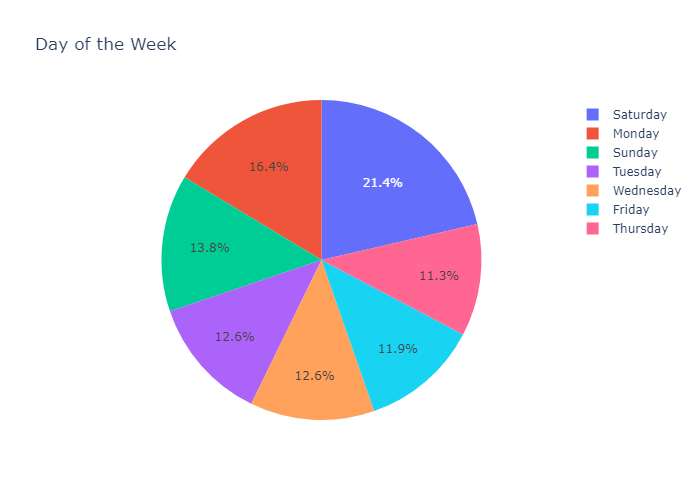

In [26]:
#plotting the day olumn as a pie
fig = px.pie(spam_day, values = 'count', names = 'day', title = 'Day of the Week')
fig.show("png")

#### **Time**

In [27]:
spam['Time'].describe()

count       159
unique      156
top       23:03
freq          2
Name: Time, dtype: object

In [28]:
#convert the Time column to datetime
spam['Time'] = pd.to_datetime(spam['Time'])
spam['Time'] = spam['Time'].dt.time

#round the time to the nearest hour
spam['time_of_day'] = spam['Time'].apply(lambda dt: dt.replace(minute=0, second=0, microsecond=0))

spam['Time'].describe()

count          159
unique         156
top       23:03:00
freq             2
Name: Time, dtype: object

In [29]:
#new dataframe with the time of day and the count of each time
spam_time = pd.DataFrame(spam['time_of_day'].value_counts()).reset_index()

spam_time.rename(columns = {spam_time.columns[0]:'time_of_day', spam_time.columns[1]:'count'}, inplace = True)

#order the time of day column by time 
spam_time = spam_time.sort_values(by = 'time_of_day')

spam_time

,time_of_day,count
13,00:00:00,6
19,01:00:00,4
12,02:00:00,6
11,03:00:00,6
6,04:00:00,8
0,05:00:00,12
16,06:00:00,5
5,07:00:00,9
7,08:00:00,8
2,09:00:00,10


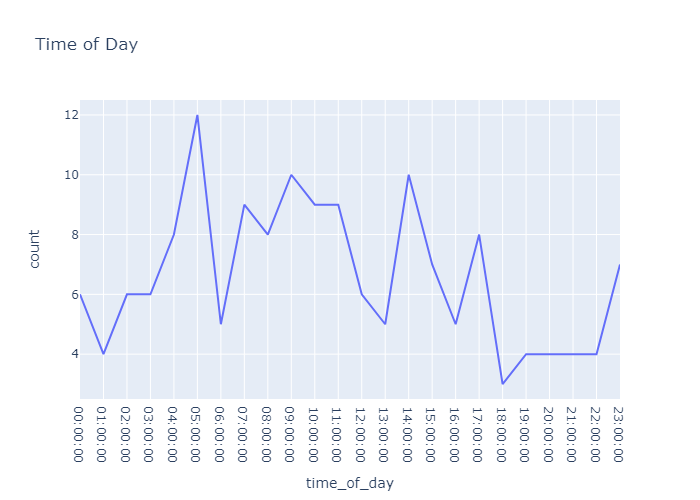

In [30]:
#plot the time of day column as a time series
fig = px.line(spam_time, x = 'time_of_day', y = 'count', title = 'Time of Day')
fig.show("png")

### **Incidents per Region**

In [31]:
incidents

,region,number
0,BARMM,390.48
1,CAR,112.60
2,CARAGA,500.00
3,NCR,2739.52
4,Region 1,113.30
5,Region 10,374.01
6,Region 11,189.71
7,Region 12,390.41
8,Region 2,83.33
9,Region 3,3484.73


In [32]:
px.set_mapbox_access_token(open("Supplemental Files\mapbox_token.txt").read())

In [33]:
#plot incidents as philippines map
#fig = px.scatter_geo(incidents, lat = 'latitude', lon = 'longitude', 
#                     color = 'network', hover_name = 'network', 
#                     size = 'count', projection = 'natural earth', 
#                     title = 'Incidents in the Philippines')
#fig.show("png")

In [34]:
regions = pd.read_json("Supplemental Files\Regions.json")
regions

,type,features
0,FeatureCollection,"{'type': 'Feature', 'properties': {'REGION': '..."
1,FeatureCollection,"{'type': 'Feature', 'properties': {'REGION': '..."
2,FeatureCollection,"{'type': 'Feature', 'properties': {'REGION': '..."
3,FeatureCollection,"{'type': 'Feature', 'properties': {'REGION': '..."
4,FeatureCollection,"{'type': 'Feature', 'properties': {'REGION': '..."
5,FeatureCollection,"{'type': 'Feature', 'properties': {'REGION': '..."
6,FeatureCollection,"{'type': 'Feature', 'properties': {'REGION': '..."
7,FeatureCollection,"{'type': 'Feature', 'properties': {'REGION': '..."
8,FeatureCollection,"{'type': 'Feature', 'properties': {'REGION': '..."
9,FeatureCollection,"{'type': 'Feature', 'properties': {'REGION': '..."


In [35]:
#import json

In [36]:
#with open('Supplemental Files\Regions.json') as file:
#    data = json.load(file)

# Extract the necessary information from the JSON data
#features = data['features']
#region_names = [feature['properties']['REGION'] for feature in features]
#region_geometry = [feature['geometry'] for feature in features]

# Create a DataFrame
#df = pd.DataFrame({'name': region_names, 'geometry': region_geometry})

# Create the choropleth map
#fig = px.choropleth(df, geojson=df['geometry'], locations=df.index,
#                    color='name',
#                    color_discrete_sequence=px.colors.qualitative.Plotly,
#                    labels={'name': 'Region'},
#                    title='Regions in the Philippines')
#fig.update_geos(fitbounds="locations", visible=False)  # Fit map to the region bounds
#fig.show("png")

In [37]:
#map to follow
